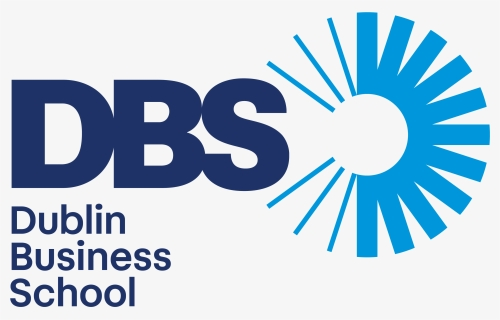

## **Electronic Assignment Cover Sheet**
## **Student(s) name as per the student card:**

Harshita Sunil Tewani: 10609984 \
Vaishnavi Janardhan Chavan: 10612841 \
Sushil Babulal Jangid: 10615112


Course Title: Data Analytics \
Lecturer Name: Amit Sharma \
Module/Subject Title: Programming for Data Analysis \
Assignment Title: CA2 \





# **Introduction**
To design and develop a Data Acquisition and Pre-processing Pipeline, we used Flipkart India's website and performed web scraping on it. For this first we had to import neccasary libraries such as Beautiful Soup for web scraping, Pandas for data manipulation, and Requests for HTTP requests.

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Import the requests library for making HTTP requests
import requests

# Import the BeautifulSoup library for web scraping
import bs4

# **Data Acquisition**
Next, we'll specify the URL of the Flipkart website to be scraped, followed by a GET request to retrieve the HTML content.

Here, we keep the page number as an empty space so that we can loop over it and scrap the data of multiple pages.

In [ ]:
url = "https://www.flipkart.com/search?q=iphone+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page="
res = requests.get(url)
res

<Response [200]>

The above output of  res code '200' typically means that the request was successful and the server returned the expected response.

The HTML content will then be parsed and the relevant data extracted using Beautiful Soup. In this scenario, we'll extract each iPhone's name, original price, ratings, offer percentage and offer price.

In [ ]:
soup = bs4.BeautifulSoup(res.text, 'html.parser')

The script begins by creating an empty list called 'Mobile_Details'. It then loops through the website's pages, with **range(1, 19)** specifying that pages 1 through 18 will be scraped. \

For each page, the script uses the requests library to send a request to the website and obtains the HTML content from the response object's text attribute. After that, the BeautifulSoup function from the Beautiful Soup library is used to parse the HTML text and generate a BeautifulSoup object bs. \

The script then looks for all div elements with the class "_2kHMtA" using the BeautifulSoup object's 'findAll()' method. \

Then the script extracts the 'Product_Name', 'Original_Price_₹', 'Product_Color', 'Storage', 'Display', 'Camera', 'Processor', 'Offer_Price_₹', 'Offer_%' and 'Ratings' from the website and appends all the data to the empty dictionary 'record' that we create at each iteration.

This dictionary, record, will in turn be appended to the 'Mobile_Details' list before moving onto the next iteration.




In [ ]:
Mobile_Details = []

for pages in range(1, 19):
  html = requests.get(url + str(pages))
  bs = bs4.BeautifulSoup(html.text)
  for i in bs.findAll("div", {"class" : "_2kHMtA"}):
    if i.find('div', class_ = '_2tfzpE'):
      break

    record = {}
    record['Product_Name'] = i.find('div', class_ = '_4rR01T').text.split(' (', 1)[0].strip()
    record['Product_Color'] = i.find('div', class_ = '_4rR01T').text.split(' (', 1)[1].split(', ')[0].strip()

    li_tags = bs.find_all('li')
    record['Storage'] = li_tags[0].text.strip()
    record['Display'] = li_tags[1].text.strip()
    record['Camera'] = li_tags[2].text.strip()
    record['Processor'] = li_tags[3].text.strip()

    # Checking if the product has offer or no
    if i.find('div', class_ = '_3I9_wc _27UcVY'):
      record['Original_Price_₹'] = i.find('div', class_ = '_3I9_wc _27UcVY').text.strip()
      record['Offer_Price_₹'] = i.find('div', class_ = '_30jeq3 _1_WHN1').text.strip()
      record['Offer_%'] = i.find('div', class_ = '_3Ay6Sb').text.strip()
    else:
      record['Original_Price_₹'] = i.find('div', class_ = '_30jeq3 _1_WHN1').text.strip()
      # At this point when there's no offer, we copy the original price to offer price
      record['Offer_Price_₹'] = record['Original_Price_₹']

    record['Ratings'] = i.find('div', class_ = '_3LWZlK').text.strip()

    Mobile_Details.append(record)

The 'pd.json_normalize()' function takes this list and creates a table where each dictionary key becomes a column and its corresponding value becomes the cell value.

In [ ]:
iPhone_DF = pd.json_normalize(Mobile_Details)

To further confirm, we have a quick look at this dataframe.

In [ ]:
iPhone_DF

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
0,APPLE iPhone 13,Green,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,"₹69,900","₹61,999",11% off,4.7
1,APPLE iPhone 13,Pink,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,"₹69,900","₹61,999",11% off,4.7
2,APPLE iPhone 13,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,"₹69,900","₹61,999",11% off,4.7
3,APPLE iPhone 13,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,"₹69,900","₹61,999",11% off,4.7
4,APPLE iPhone 13,Starlight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,"₹69,900","₹61,999",11% off,4.7
...,...,...,...,...,...,...,...,...,...,...
423,APPLE iPhone 12 Pro Max,Gold,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,"₹1,29,900","₹1,04,799",19% off,4.5
424,APPLE iPhone X,Silver,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,"₹91,900","₹91,900",NaN,4.6
425,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,"₹91,900","₹91,900",NaN,4.6
426,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,"₹1,06,900","₹1,06,900",NaN,4.6


The output of 'iPhone_DF.info()' includes the number of rows and columns in the DataFrame, the name of each column, the number of non-null values in each column, and the data type of each column.

In [ ]:
iPhone_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      428 non-null    object
 1   Product_Color     428 non-null    object
 2   Storage           428 non-null    object
 3   Display           428 non-null    object
 4   Camera            428 non-null    object
 5   Processor         428 non-null    object
 6   Original_Price_₹  428 non-null    object
 7   Offer_Price_₹     428 non-null    object
 8   Offer_%           292 non-null    object
 9   Ratings           428 non-null    object
dtypes: object(10)
memory usage: 33.6+ KB


'iPhone_DF.describe()' is used to get an overview of the count of data, frequency and uniqueness of data in the iPhone_DF DataFrame.

In [ ]:
iPhone_DF.describe()

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
count,428,428,428,428,428,428,428,428,292,428
unique,34,29,4,9,5,8,64,100,36,8
top,APPLE iPhone 13 Pro Max,Silver,256 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,"₹64,900","₹71,999",7% off,4.6
freq,21,60,168,96,168,96,21,16,35,137


# **Data Preprocessing and Transformation**
After going through the description of the iPhone_DF dataframe, we now preprocess the columns. This includes removing the ("₹", ",", and "% off") from the columns using the 'str.replace' method

In [ ]:
iPhone_DF['Original_Price_₹'] = iPhone_DF['Original_Price_₹'].str.replace('₹', '')
iPhone_DF['Offer_Price_₹'] = iPhone_DF['Offer_Price_₹'].str.replace('₹', '')

In [ ]:
iPhone_DF['Original_Price_₹'] = iPhone_DF['Original_Price_₹'].str.replace(',','')
iPhone_DF['Offer_Price_₹'] = iPhone_DF['Offer_Price_₹'].str.replace(',','')

In [ ]:
iPhone_DF['Offer_%'] = iPhone_DF['Offer_%'].str.replace('% off','')

Furthermore, we converted the datatype of 'Original_Price_₹', 'Offer_Price_₹', 'Ratings', and 'Offer_%' from object to float.

In [ ]:
iPhone_DF['Original_Price_₹'] = iPhone_DF['Original_Price_₹'].astype('float')
iPhone_DF['Offer_Price_₹'] = iPhone_DF['Offer_Price_₹'].astype('float')
iPhone_DF['Ratings'] = iPhone_DF['Ratings'].astype('float')
iPhone_DF['Offer_%'] = iPhone_DF['Offer_%'].astype('float')

In [ ]:
iPhone_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      428 non-null    object 
 1   Product_Color     428 non-null    object 
 2   Storage           428 non-null    object 
 3   Display           428 non-null    object 
 4   Camera            428 non-null    object 
 5   Processor         428 non-null    object 
 6   Original_Price_₹  428 non-null    float64
 7   Offer_Price_₹     428 non-null    float64
 8   Offer_%           292 non-null    float64
 9   Ratings           428 non-null    float64
dtypes: float64(4), object(6)
memory usage: 33.6+ KB


Next, we check if there are any null values in the dataframe.

In [ ]:
iPhone_DF.isna().sum().sum()

136

If any null values are found, we replace them with 0.

As we have already seen the dataset and we know only the Offer_% column has missing values as some phones do not have offers and we have copied the original price to the offer price at the time of data retrieval, now we make sure we fill in the Offer_% to 0.

In [ ]:
iPhone_DF['Offer_%'].isna().sum().sum()

136

In [ ]:
iPhone_DF['Offer_%'].fillna(0, inplace=True)

As we can see, there are no null values now.

In [ ]:
iPhone_DF.isna().sum().sum()

0

In [ ]:
iPhone_DF

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
0,APPLE iPhone 13,Green,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
1,APPLE iPhone 13,Pink,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
2,APPLE iPhone 13,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
3,APPLE iPhone 13,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
4,APPLE iPhone 13,Starlight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
...,...,...,...,...,...,...,...,...,...,...
423,APPLE iPhone 12 Pro Max,Gold,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,129900.0,104799.0,19.0,4.5
424,APPLE iPhone X,Silver,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,91900.0,91900.0,0.0,4.6
425,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,91900.0,91900.0,0.0,4.6
426,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,106900.0,106900.0,0.0,4.6


# Quering Data using DataFrame

**Q.** Finding a White color iPhone within ₹60000.

In [ ]:
condition_1 = (iPhone_DF['Original_Price_₹'] < 60000) & \
              (iPhone_DF['Product_Color'] == 'White')
iPhone_DF[condition_1]

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
6,APPLE iPhone 11,White,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,48900.0,44999.0,7.0,4.6
13,APPLE iPhone 11,White,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,43900.0,40999.0,6.0,4.6
34,APPLE iPhone 12,White,64 GB ROM,15.49 cm (6.1 inch) Liquid Retina HD Display,12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,59900.0,53999.0,9.0,4.6
127,APPLE iPhone XR,White,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",47900.0,36999.0,22.0,4.6
139,APPLE iPhone 12 mini,White,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",59900.0,50999.0,14.0,4.5
167,APPLE iPhone SE,White,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",54900.0,40990.0,25.0,4.5
182,Apple iPhone XR,White,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",47900.0,36999.0,22.0,4.6
191,Apple iPhone SE,White,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",54900.0,40990.0,25.0,4.5
233,APPLE iPhone SE,White,512 GB ROM,14.73 cm (5.8 inch) Super Retina XDR Display,12MP + 12MP + 12MP | 12MP Front Camera,A13 Bionic Chip Processor,39900.0,28990.0,27.0,4.5
245,APPLE iPhone SE,White,256 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",39900.0,28990.0,27.0,4.5


**Q.** Finding an iPhone on a discount of more than 17% and with price more than ₹90000

In [ ]:
condition_2 = (iPhone_DF['Offer_Price_₹'] > 90000) & \
              (iPhone_DF['Offer_%'] >= 17)
iPhone_DF[condition_2]

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
108,APPLE iPhone 12 Pro,Gold,128 GB ROM,11.94 cm (4.7 inch) Retina HD Display,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,139900.0,106699.0,23.0,4.5
122,APPLE iPhone 11 Pro Max,Gold,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",117100.0,95699.0,18.0,4.7
131,APPLE iPhone 11 Pro Max,Space Grey,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",117100.0,95699.0,18.0,4.7
171,APPLE iPhone 12 Pro,Silver,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",139900.0,106699.0,23.0,4.5
183,APPLE iPhone 12 Pro,Graphite,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",139900.0,106699.0,23.0,4.5
353,APPLE iPhone 11 Pro Max,Midnight Green,256 GB ROM,11.94 cm (4.7 inch) Retina HD Display,12MP Rear Camera | 7MP Front Camera,A10 Fusion Chip with 64-bit Architecture and E...,131900.0,101999.0,22.0,4.7
361,APPLE iPhone 11 Pro Max,Midnight Green,64 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,131900.0,101999.0,22.0,4.7
371,APPLE iPhone 11 Pro Max,Silver,64 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,117100.0,95699.0,18.0,4.7
380,APPLE iPhone 12 Pro Max,Graphite,64 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,119900.0,95599.0,20.0,4.5
381,APPLE iPhone 12 Pro Max,Silver,64 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,119900.0,95599.0,20.0,4.5


**Q.** Finding an iPhone with rating higher than 4.5, on more than 15% discount and within ₹70000.

In [ ]:
condition_3 = (iPhone_DF['Ratings'] > 4.5) & \
              ((iPhone_DF['Offer_Price_₹'] < 70000) & \
               (iPhone_DF['Offer_%'] > 15))
iPhone_DF[condition_3]

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
88,Apple iPhone XR,(PRODUCT)RED,64 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A14 Bionic Chip with Next Generation Neural En...,47900.0,36999.0,22.0,4.6
109,Apple iPhone XR,(PRODUCT)RED,128 GB ROM,11.94 cm (4.7 inch) Retina HD Display,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,47900.0,36999.0,22.0,4.6
121,Apple iPhone XR,Blue,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",47900.0,36999.0,22.0,4.6
127,APPLE iPhone XR,White,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",47900.0,36999.0,22.0,4.6
129,APPLE iPhone 8 Plus,Space Grey,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",74624.0,49900.0,33.0,4.6
134,APPLE iPhone XR,(PRODUCT)RED,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor",47900.0,36999.0,22.0,4.6
144,APPLE iPhone 8 Plus,Gold,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",77060.0,49900.0,35.0,4.6
168,APPLE iPhone 8 Plus,Silver,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",80730.0,49900.0,38.0,4.6
181,Apple iPhone XR,Black,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",47900.0,36999.0,22.0,4.6
182,Apple iPhone XR,White,64 GB ROM,13.97 cm (5.5 inch) Retina HD Display,12MP + 12MP | 7MP Front Camera,"A11 Bionic Chip with 64-bit Architecture, Neur...",47900.0,36999.0,22.0,4.6


**Q.** Finding an iPhone with 128GB storage, color - blue or midnight and within ₹80000.

In [ ]:
condition_4 = (iPhone_DF['Storage'] == '128 GB ROM') & \
              ((iPhone_DF['Product_Color'] == 'Blue') | \
               (iPhone_DF['Product_Color'] == 'Midnight')) & \
              (iPhone_DF['Offer_Price_₹'] < 80000)
iPhone_DF[condition_4]

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
2,APPLE iPhone 13,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
3,APPLE iPhone 13,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
7,APPLE iPhone 14,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,79900.0,71999.0,9.0,4.6
8,APPLE iPhone 14,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,79900.0,71999.0,9.0,4.6
12,APPLE iPhone 14 Plus,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,89900.0,79999.0,11.0,4.7
22,APPLE iPhone 13,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,79900.0,71999.0,9.0,4.7


# **Converting the DataFrame to a .csv file**
Using the '.to_csv' method to convert the dataframe to a csv file.

In [ ]:
iPhone_DF.to_csv('iphones.csv', index = False)

In [ ]:
iPhone_csv = pd.read_csv('iphones.csv')

Reading the CSV file.

In [ ]:
iPhone_csv

,Product_Name,Product_Color,Storage,Display,Camera,Processor,Original_Price_₹,Offer_Price_₹,Offer_%,Ratings
0,APPLE iPhone 13,Green,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
1,APPLE iPhone 13,Pink,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
2,APPLE iPhone 13,Midnight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
3,APPLE iPhone 13,Blue,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
4,APPLE iPhone 13,Starlight,128 GB ROM,15.49 cm (6.1 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,A15 Bionic Chip Processor,69900.0,61999.0,11.0,4.7
...,...,...,...,...,...,...,...,...,...,...
423,APPLE iPhone 12 Pro Max,Gold,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,129900.0,104799.0,19.0,4.5
424,APPLE iPhone X,Silver,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,91900.0,91900.0,0.0,4.6
425,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,91900.0,91900.0,0.0,4.6
426,APPLE iPhone X,Space Gray,128 GB ROM,15.49 cm (6.1 inch) Display,12MP Rear Camera | 7MP Front Camera,A12 Bionic Chip Processor,106900.0,106900.0,0.0,4.6


# **Loading the data into Database**
Below code imports the sqlite3 library, which provides a way to connect to and interact with SQLite databases using Python.

The 'conn' creates a new connection to a database named iphone.db. If the database does not already exist, it will be created automatically. If the file already exists, it will be opened for reading and writing.

The cursor object, which allows us to execute SQL commands on the database. We can use the cursor to execute queries and fetch results from the database.

In [ ]:
import sqlite3

conn = sqlite3.connect('iphone.db')
c = conn.cursor()

Before we create our 'iPhoneData' table we drop the table if it exists, in case of multiple runs of the file.

Now, this will let us create the table again without any errors/interruptions for the further steps.

In [ ]:
c.execute('DROP TABLE IF EXISTS iPhoneData')

Using the '.execute()' we create a new table named 'iPhoneData' in the connected SQLite database, with the specified column names and data types:

In [ ]:
c.execute('''CREATE TABLE iPhoneData (
                product_name text,
                product_color text,
                storage text,
                display text,
                camera text,
                processor text,
                original_price real,
                offer_price real,
                offer_perc real,
                ratings real
              )''')

The code is iterating through each row of the iPhone_DF DataFrame using the itertuples() method and to insert the values into the table we use 'c.execute' statement.

In [ ]:
for row in iPhone_DF.itertuples(index=False):
  c.execute('INSERT INTO iPhoneData VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)', row)

For printing all the rows, we use for loop of 'SELECT * FROM' statement in 'c.execute'.

In [ ]:
for row in c.execute('SELECT * FROM iPhoneData'):
  print(row)

('APPLE iPhone 13', 'Green', '128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 69900.0, 61999.0, 11.0, 4.7)
('APPLE iPhone 13', 'Pink', '128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 69900.0, 61999.0, 11.0, 4.7)
('APPLE iPhone 13', 'Midnight', '128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 69900.0, 61999.0, 11.0, 4.7)
('APPLE iPhone 13', 'Blue', '128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 69900.0, 61999.0, 11.0, 4.7)
('APPLE iPhone 13', 'Starlight', '128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A15 Bionic Chip Processor', 69900.0, 61999.0, 11.0, 4.7)
('APPLE iPhone 11', 'Black', '128 GB ROM', '15.49 cm (6.1 inch) Super Retin

**Q.** SQL statement to sort the "ratings" column in descending order

In [ ]:
query_1 = '''SELECT product_name, product_color, original_price, offer_price, ratings FROM iPhoneData \
              ORDER BY ratings DESC'''
for row in c.execute(query_1):
  print(row)

('APPLE iPhone 7 Plus', 'PRODUCT) (Red', 92000.0, 85400.0, 5.0)
('APPLE iPhone 13', 'Green', 69900.0, 61999.0, 4.7)
('APPLE iPhone 13', 'Pink', 69900.0, 61999.0, 4.7)
('APPLE iPhone 13', 'Midnight', 69900.0, 61999.0, 4.7)
('APPLE iPhone 13', 'Blue', 69900.0, 61999.0, 4.7)
('APPLE iPhone 13', 'Starlight', 69900.0, 61999.0, 4.7)
('APPLE iPhone 14 Plus', 'Purple', 89900.0, 79999.0, 4.7)
('APPLE iPhone 14 Plus', 'Blue', 89900.0, 79999.0, 4.7)
('APPLE iPhone 14 Plus', 'Starlight', 89900.0, 79999.0, 4.7)
('APPLE iPhone 14 Plus', '(PRODUCT)RED', 89900.0, 77999.0, 4.7)
('APPLE iPhone 13', '(PRODUCT)RED', 69900.0, 61999.0, 4.7)
('APPLE iPhone 14 Pro', 'Space Black', 129900.0, 119999.0, 4.7)
('APPLE iPhone 13', 'Midnight', 79900.0, 71999.0, 4.7)
('APPLE iPhone 13', 'Blue', 79900.0, 71999.0, 4.7)
('APPLE iPhone 14 Pro Max', 'Space Black', 139900.0, 127999.0, 4.7)
('APPLE iPhone 13', '(PRODUCT)RED', 69900.0, 61999.0, 4.7)
('APPLE iPhone 14 Plus', 'Midnight', 89900.0, 79999.0, 4.7)
('APPLE iPhone 1

**Q.**  SQL statement to select all the columns from the "iPhone" table where the "product_name" column ends with the string "XS"

In [ ]:
query_2 = '''SELECT * FROM iPhoneData \
              WHERE product_name LIKE '%XS' '''
for row in c.execute(query_2):
  print(row)

('APPLE iPhone XS', 'Space Grey', '64 GB ROM', '13.97 cm (5.5 inch) Retina HD Display', '12MP + 12MP | 7MP Front Camera', 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor', 134900.0, 134900.0, 0.0, 4.7)
('APPLE iPhone XS', 'Gold', '64 GB ROM', '13.97 cm (5.5 inch) Retina HD Display', '12MP + 12MP | 7MP Front Camera', 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor', 134900.0, 134900.0, 0.0, 4.7)
('APPLE iPhone XS', 'Space Grey', '256 GB ROM', '13.72 cm (5.4 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A14 Bionic Chip with Next Generation Neural Engine Processor', 89900.0, 89900.0, 0.0, 4.7)
('APPLE iPhone XS', 'Gold', '256 GB ROM', '13.72 cm (5.4 inch) Super Retina XDR Display', '12MP + 12MP | 12MP Front Camera', 'A14 Bionic Chip with Next Generation Neural Engine Processor', 103900.0, 103900.0, 0.0, 4.7)
('APPLE iPhone XS', 'Space Grey', '64 GB ROM', '15.49 cm

**Q.** SQL statement to select all the columns from "iPhone" table where storage is greater than or equal to 512

In [ ]:
query_3 = '''SELECT product_name, product_color, storage, display, processor, camera FROM iPhoneData \
              WHERE storage LIKE '512%' \
              ORDER BY offer_price DESC '''
for row in c.execute(query_3):
  print(row)

('APPLE iPhone 14 Pro Max', 'Space Black', '512 GB ROM', '16.51 cm (6.5 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12MP + 12MP | 12MP Front Camera')
('APPLE iPhone 11 Pro Max', 'Midnight Green', '512 GB ROM', '16.51 cm (6.5 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12MP + 12MP | 12MP Front Camera')
('APPLE iPhone 11 Pro Max', 'Silver', '512 GB ROM', '16.51 cm (6.5 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12MP + 12MP | 12MP Front Camera')
('APPLE iPhone 11 Pro', 'Gold', '512 GB ROM', '14.73 cm (5.8 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12MP + 12MP | 12MP Front Camera')
('APPLE iPhone 11 Pro', 'Silver', '512 GB ROM', '14.73 cm (5.8 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12MP + 12MP | 12MP Front Camera')
('APPLE iPhone 12 Pro Max', 'Graphite', '512 GB ROM', '16.51 cm (6.5 inch) Super Retina XDR Display', 'A13 Bionic Chip Processor', '12MP + 12M

Finally, commiting and closing the connection to the sqlite database.

In [ ]:
conn.commit()
conn.close()

# **Contributions**



*   Sushil Babulal Jangid

> Data Acquisition - For any web scraping to begin, we first need a website that can be scrapped legally. For that, I browsed through various websites and finally it came down to India's Flipkart website. Here, I first fetched the URL and confirmed whether it's connected or not.Next, using beautiful soup and HTML requests, I retrieved the data and stored it into a dataframe.


*   Vaishnavi Janardhan Chavan

> Data Preprocessing and Transformation - Here, I have transformed the original price, offer price and offer percentage column from object datatype to float datatype. Thereafter, I replaced the null values with zeroes which were present only in the offer percentage column.

> Quering Data using DataFrame - Using pandas, I've noted down some custom queries and displayed it's results.


*   Harshita Sunil Tewani

> Converting the DataFrame to a .csv file - With the to_csv() method, saving our data into a csv file for offline access.

> Loading the data into Database - For working on the database, I have chosen sqlite3 which can be imported directly on Google Collab and can be used by anyone irrespective of it being installed on their system. Firstly, a database connection 'iphone.db' is made. Secondly, creating a database and inserting our data into it. Next, I run a few queries. Lastly, I commint the changes and close the connection.

